# Problem Statement
The dataset contains information on loans issued between 2007 and 2011. The task is to perform an exploratory data analysis (EDA) to understand the characteristics of the loan data and uncover insights that might be useful for business decisions.

## Step 1: Loading and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Print version of each library
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Seaborn version: 0.13.2


In [2]:
# Load the dataset
loan_data = pd.read_csv("loan.csv")

# Check the first few rows and column data types
loan_data.head()

C:\Users\gsahoo\AppData\Local\Temp\ipykernel_376\1079001071.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Check the shape of loan data
print(loan_data.shape)

# Display the NaN values in all columns
loan_data.isnull().sum()

(39717, 111)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

- Several columns consist entirely of either NaN values or zeros, and these can be identified for removal or handling.
- The loan term column includes a suffix indicating months, which can be stripped for cleaner data processing.
- Similarly, the interest rate column includes a suffix indicating %, which can be stripped as well.
- There are a few irrelevant columns, such as id, member_id, emp_title, title, url, and zip_code, which can be dropped as they are not required for the analysis.

## Step 2: Data Cleaning and Manipulation - Check for missing values, duplicates, or inconsistencies

In [4]:
# Drop columns where all values are NaN
loan_data.dropna(axis=1, how='all', inplace=True)
loan_data.shape

(39717, 57)

In [5]:
# Drop columns where all values are 0
loan_data = loan_data.loc[:, (loan_data != 0).any(axis=0)]
loan_data.shape

(39717, 55)

In [6]:
# Drop columns where NaN values are more than 50%
loan_data = loan_data.dropna(axis=1, thresh=int((0.5) * len(loan_data)))
loan_data.shape

(39717, 52)

In [7]:
#Drop duplicates if any
loan_data = loan_data.drop_duplicates()
loan_data.shape

(39717, 52)

In [8]:
#Drop irrelevant columns for analysis
loan_data = loan_data.drop(columns=['id', 'member_id', 'emp_title', 'title', 'url', 'zip_code'])
loan_data.shape

(39717, 46)

In [9]:
# Convert term column to int
loan_data['term'] = loan_data['term'].apply(lambda x: int(x.replace('months', '').strip()))

# Convert int_rate column to float
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [10]:
# Convert 'annual_inc' to numeric, handling scientific notation and non-numeric values
loan_data['annual_inc'] = pd.to_numeric(loan_data['annual_inc'], errors='coerce')

In [11]:
loan_data.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
desc                           object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                     object
total_acc   

In [12]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39661.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,2.000000,0.0


## Step 3: Univariate Analysis - Descriptive Statistics for following variables:
- Numerical
1. Loan Amount (loan_amnt)
2. Funded Amount (funded_amnt)
3. Interest Rate (int_rate)
4. Debt to Income Ratio (dti)
5. Installment (installment)
6. Annual Income (annual_inc)
- Categorical
1. Term (term)
2. Grade (grade)
3. Sub Grade (sub_grade)
4. Loan Status (loan_status)
5. Home Ownership (home_ownership)
6. Loan Purpose (purpose)
7. Loan Verification Status (verification_status)
8. Derived - Loan issued year (issue_year)
9. Derived - Loan issued month (issue_month)

### Distribution of Loan Amount and Funded Amount

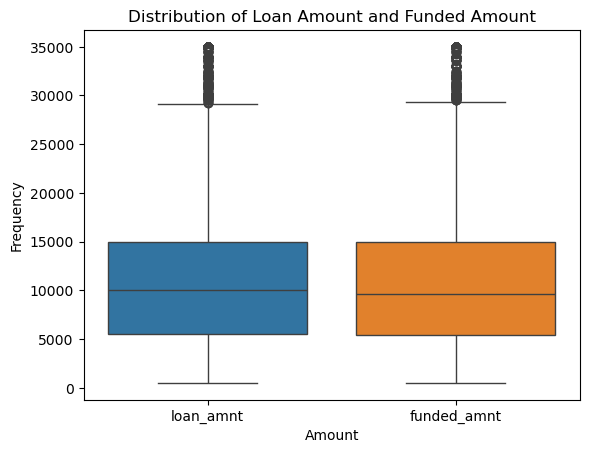

In [13]:
sns.boxplot(data=loan_data[['loan_amnt', 'funded_amnt']])
plt.title('Distribution of Loan Amount and Funded Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

- The loan amount is mostly between 5500 to 15000 where outliers are mostly above 30000.
- The funded amount is mostly between 5400 to 15000 where outliers are mostly above 30000.

### Distribution of Interest Rate and Debt to Income Ratio

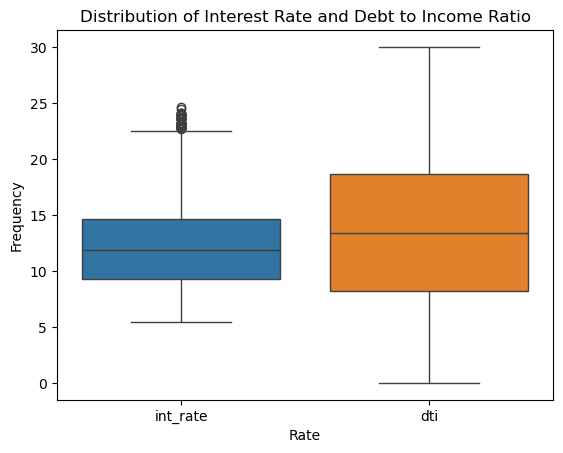

In [14]:
sns.boxplot(data=loan_data[['int_rate', 'dti']])
plt.title('Distribution of Interest Rate and Debt to Income Ratio')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

- The interest rate is mostly bwtween 9.25% to 14.59% where outliers are above 22.5%.
- The debt to income ration is mostly between 8.17% to 18.6%.

### Distribution of Installment

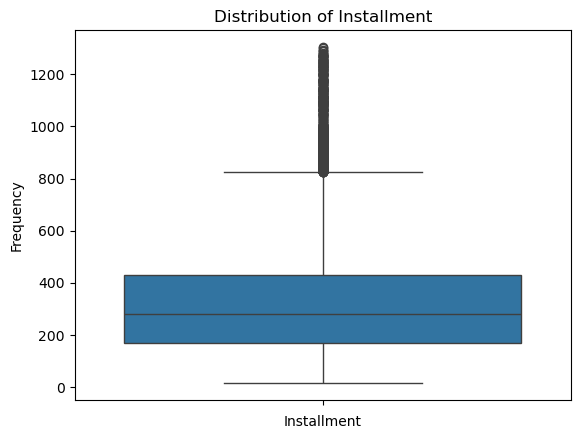

In [15]:
sns.boxplot(data=loan_data['installment'])
plt.title('Distribution of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

- The installment is mostly between 167.02 to 430.78 with outliers are above 800.

### Distribution of Annual Income

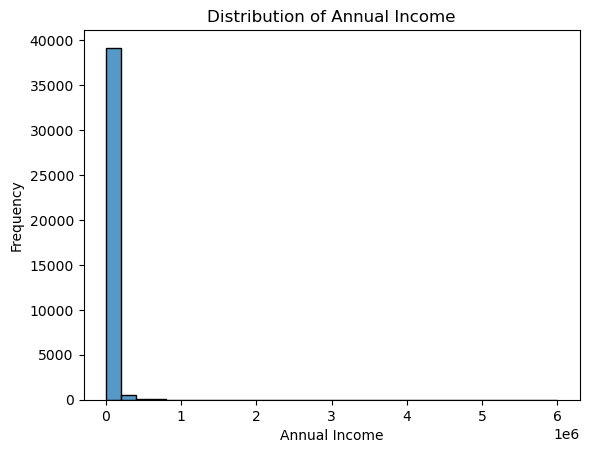

In [16]:
sns.histplot(data=loan_data['annual_inc'], bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

- Most loan applicants has annual income below 100,000.

### Distribution of Term

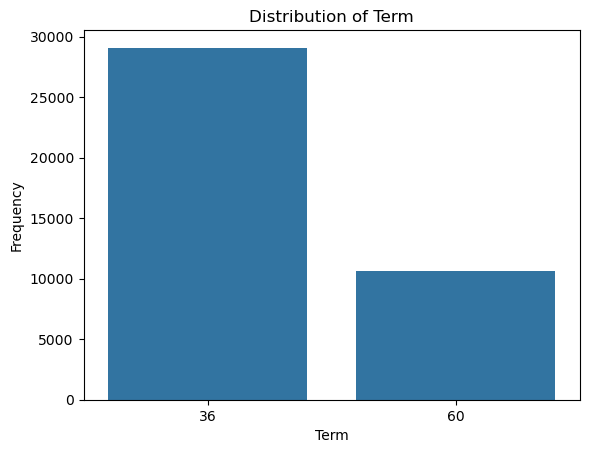

In [17]:
sns.countplot(x='term', data=loan_data)
plt.title('Distribution of Term')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()

- Loan taken for 3 years is almost thrice the loan taken for 5 years. So mostly 3 years loan is preffered.

### Distribution of Grade, Sub-Grade, Loan Status, Home Ownership, Purpose and Verification Status

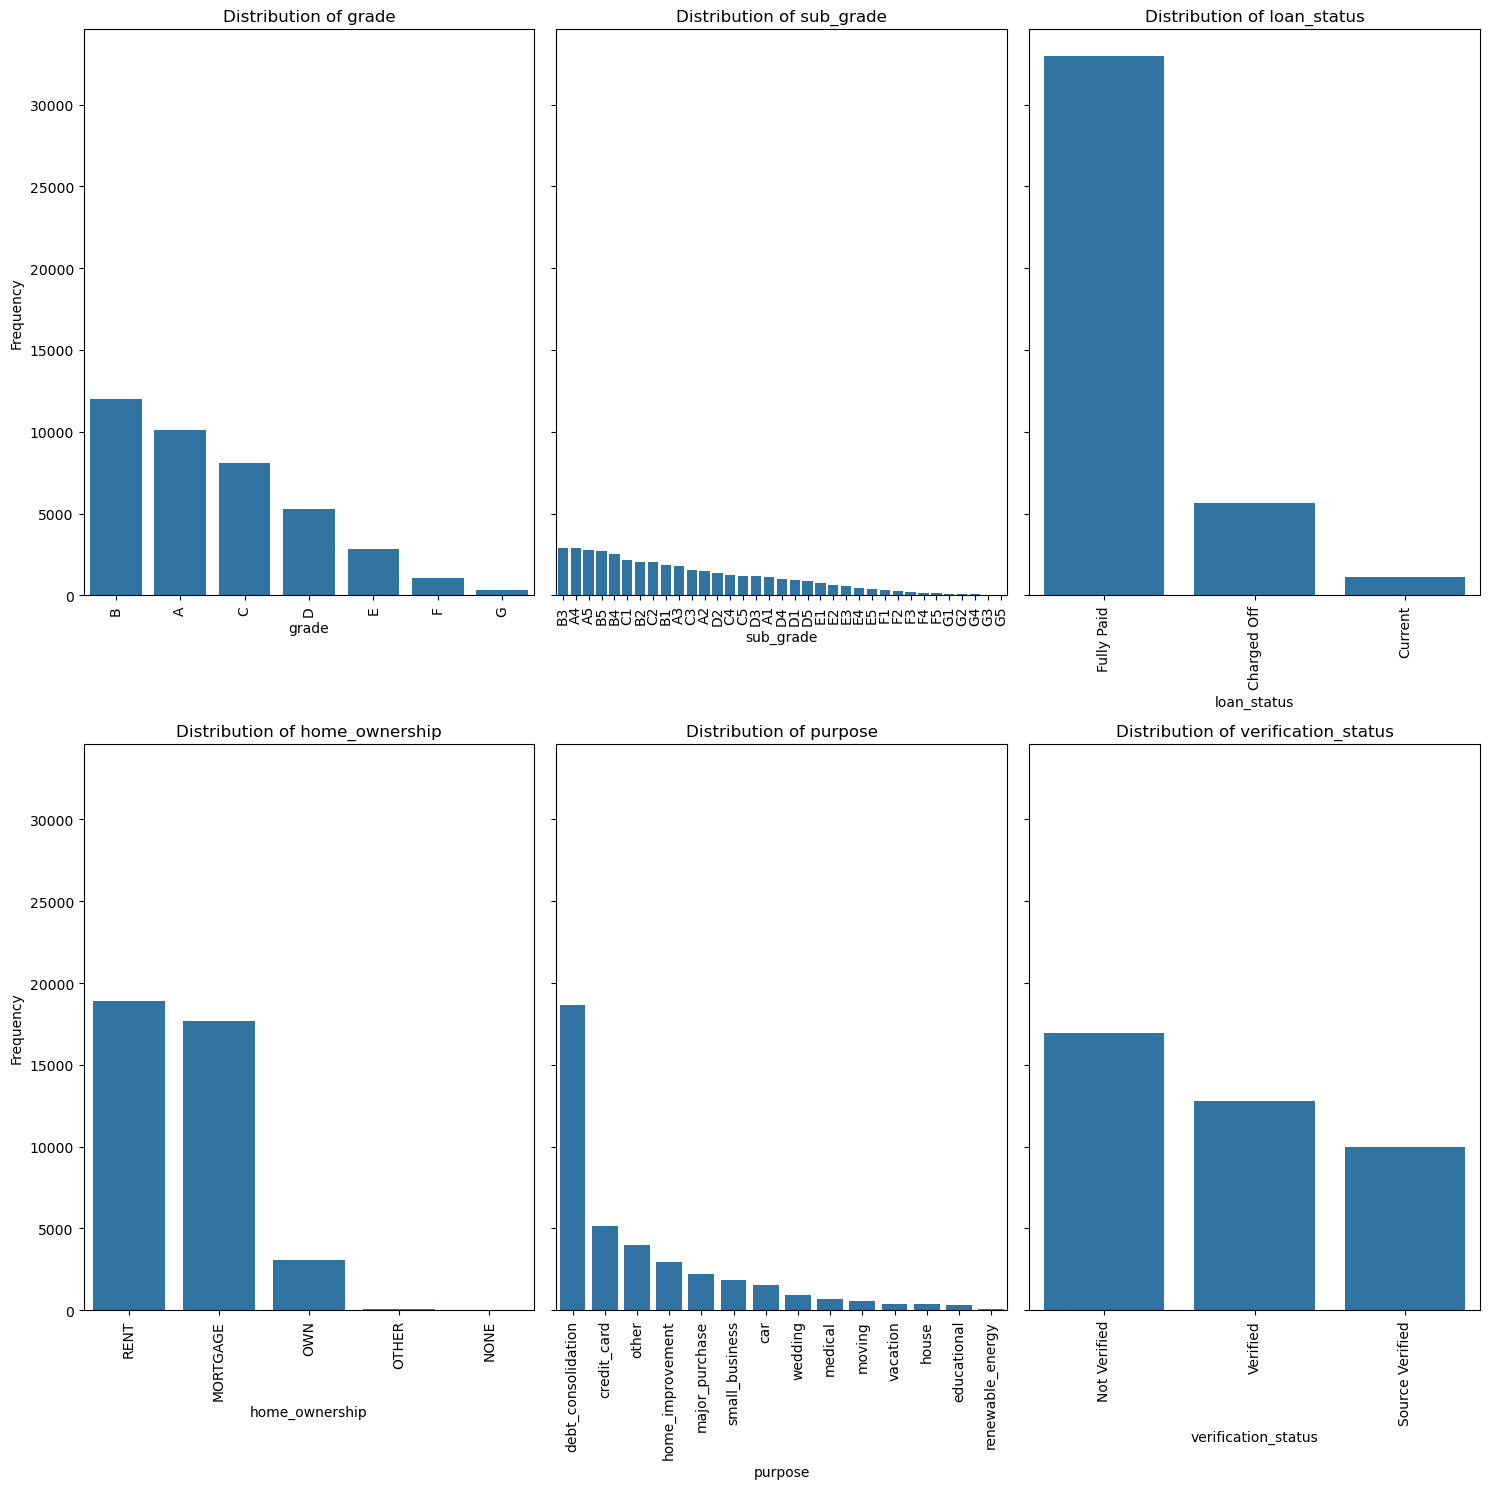

In [18]:
columns_to_plot = ['grade', 'sub_grade', 'loan_status', 'home_ownership', 'purpose', 'verification_status']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15), sharey=True)

# Flatten axes for easy iteration (in case of single-row or single-column layouts)
axes = axes.flatten()

for ax, col in zip(axes, columns_to_plot):
    # Get the order of categories in decreasing count
    order = loan_data[col].value_counts().index
    
    sns.countplot(x=col, data=loan_data, ax=ax, order=order)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels without

plt.tight_layout()
plt.show()

- The majority of loans are taken by borrowers with Grade B, A, and C, with the highest concentrations observed in sub-grades B3, A4, A5, B5, B4, and C1.
- The number of charged-off loans is approximately one-sixth of the total number of fully paid loans, indicating a significant proportion of defaults.
- A substantial number of loans are taken by individuals who rent or mortgage their homes, suggesting that homeownership status is a key factor for loan applicants.
- The most common reason for taking out loans is debt consolidation, reflecting a trend of borrowers seeking to streamline or reduce existing debt obligations.
- A majority of loans are granted to individuals whose income source is not verified, potentially indicating more lenient lending practices or reliance on other factors for loan approval.

### Distribution of Issue Year and Issue Month

In [19]:
# Convert 'issue_d' to datetime using the appropriate format
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y', errors='coerce')

# Extract the year from the datetime column
loan_data['issue_year'] = loan_data['issue_d'].dt.year

# Extract the month (optional)
loan_data['issue_month'] = loan_data['issue_d'].dt.month

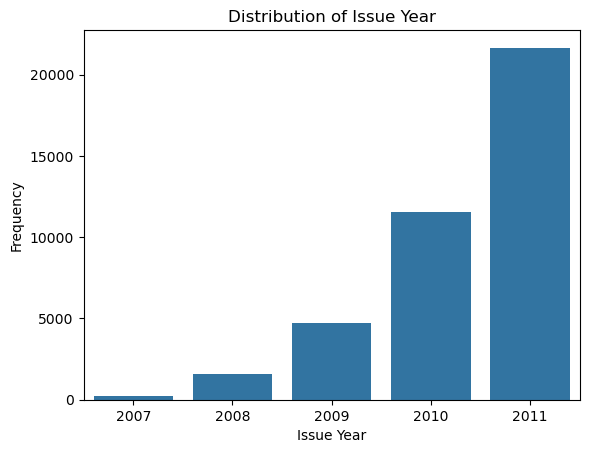

In [20]:
sns.countplot(x='issue_year', data=loan_data)
plt.title('Distribution of Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Frequency')
plt.show()

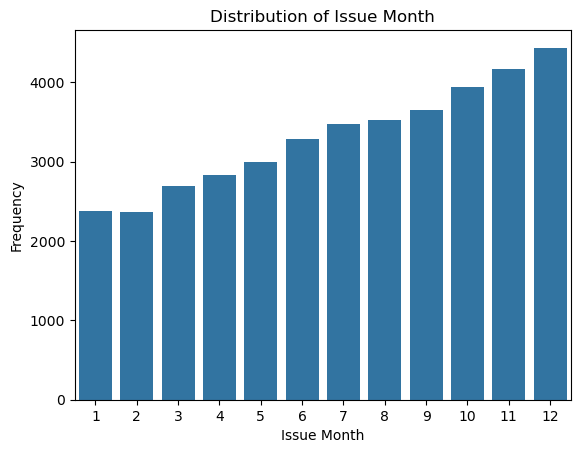

In [21]:
sns.countplot(x='issue_month', data=loan_data)
plt.title('Distribution of Issue Month')
plt.xlabel('Issue Month')
plt.ylabel('Frequency')
plt.show()

- The number of loans issued has consistently increased year over year, reflecting a growing demand for loans over time.
- Loan issuance shows an upward trend within each year, with the loan count increasing steadily from January to December.

## Step 4: Bivariate Analysis/Multivariate Analysis - Descriptive Statistics for following variables:
- Categorical vs Numerical
1. Loan Amount vs Loan Status across all Grades
2. Funded Amount vs Loan Status across all Grades
3. Interest Rate vs Loan Status across all Grades
4. Installment vs Loan Status across all Grades
5. Annual Income vs Loan Status across all Grades
6. Debt to Income vs Loan Status across all Grades
- Numerical vs Numerical with correlation matrix:
1. Loan Amount (loan_amnt)
2. Funded Amount (funded_amnt)
3. Funded Amount (funded_amnt_inv)
4. Interest Rate (int_rate)
5. Installment (installment) 
6. Annual Income (annual_inc) 
7. Debt to Income Ratio (dti)
- Categorical vs Categorical
1. Term vs Loan Status
2. Grades vs Loan Status
3. Home Ownership vs Loan Status
4. Purpose vs Loan Status
5. Verification Status vs Loan Status
6. Issue Year vs Loan Status

### Distribution of Loan Amount, Funded Amount, Interest Rate, Installment, Annual Income and Debt to Income against the Loan Status across all Grades

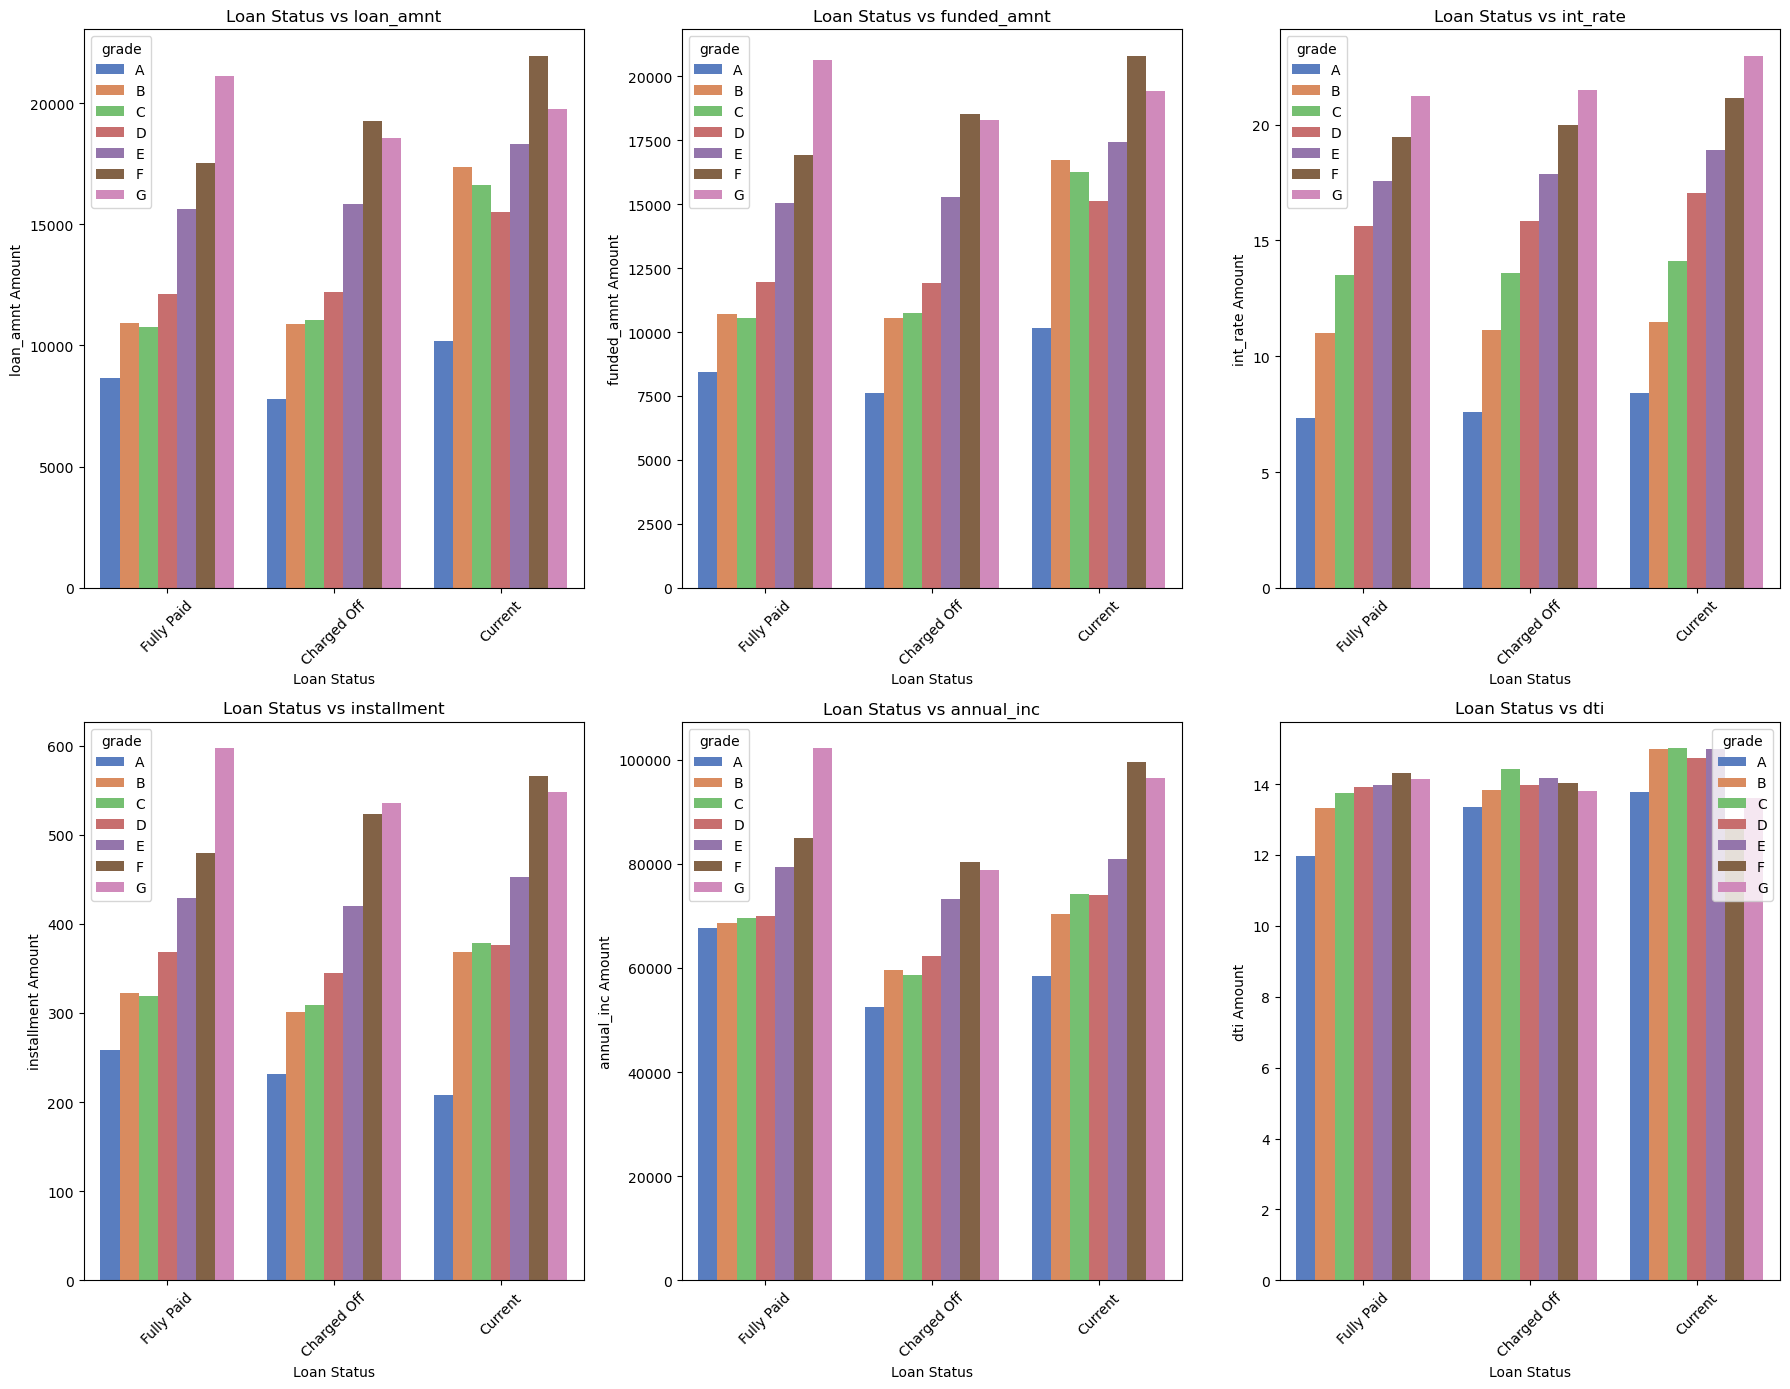

In [22]:
# List of numerical features to plot
numerical_features = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

# Set up the matplotlib figure with 2 rows and 3 columns (2x3 grid)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 14))

# Flatten axes for easy iteration
axes = axes.flatten()

# Define the order for grades
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Loop through each subplot and create a bar plot
for ax, col in zip(axes, numerical_features):
    sns.barplot(
        data=loan_data, 
        x='loan_status', 
        y=col, 
        ax=ax, 
        errorbar=None, 
        palette='muted', 
        hue='grade', 
        hue_order=grade_order  # Set the grade order
    )
    ax.set_title(f'Loan Status vs {col}')
    ax.set_xlabel('Loan Status')
    ax.set_ylabel(f'{col} Amount')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

1. Loan Amount vs Loan Status: Higher loan grades (e.g., A and B) are associated with smaller loan amounts, likely due to better creditworthiness.
2. Funded Amount vs Loan Status: Lower-grade borrowers tend to receive larger funded amounts, potentially increasing the risk of default.
3. Interest Rate vs Loan Status: Higher interest rates in lower grades may contribute to higher Charged Off.
4. Installment vs Loan Status: Since installments increases with grade, higher installments, especially in lower-grade loans, may increase likelihood of Charged Off.
5. Annual Income vs Loan Status: Borrowers with higher incomes but lower grades are more likely to default or keep loans in the Current status.
6. Debt to Income Ratio vs Loan Status: Lower-grade loans are riskier due to high DTI ratios, as borrowers are likely over-leveraged.


Risk-Factors: Lower-grade loans (E, F, G) are associated with higher loan amounts, interest rates, and DTI ratios, increasing the likelihood of default (Charged Off status).

Income Influence: Borrowers with higher annual incomes are more likely to fully repay loans.

Current Loans: Current loans tend to have higher loan amounts, funded amounts, and installments, particularly in lower grades, suggesting they are still at risk of default.

### Distribution of Loan Amount, Funded Amount, Funded Amount by Investors, Interest Rate, Installment, Annual Income and Debt to Income against each other with correlation matrix

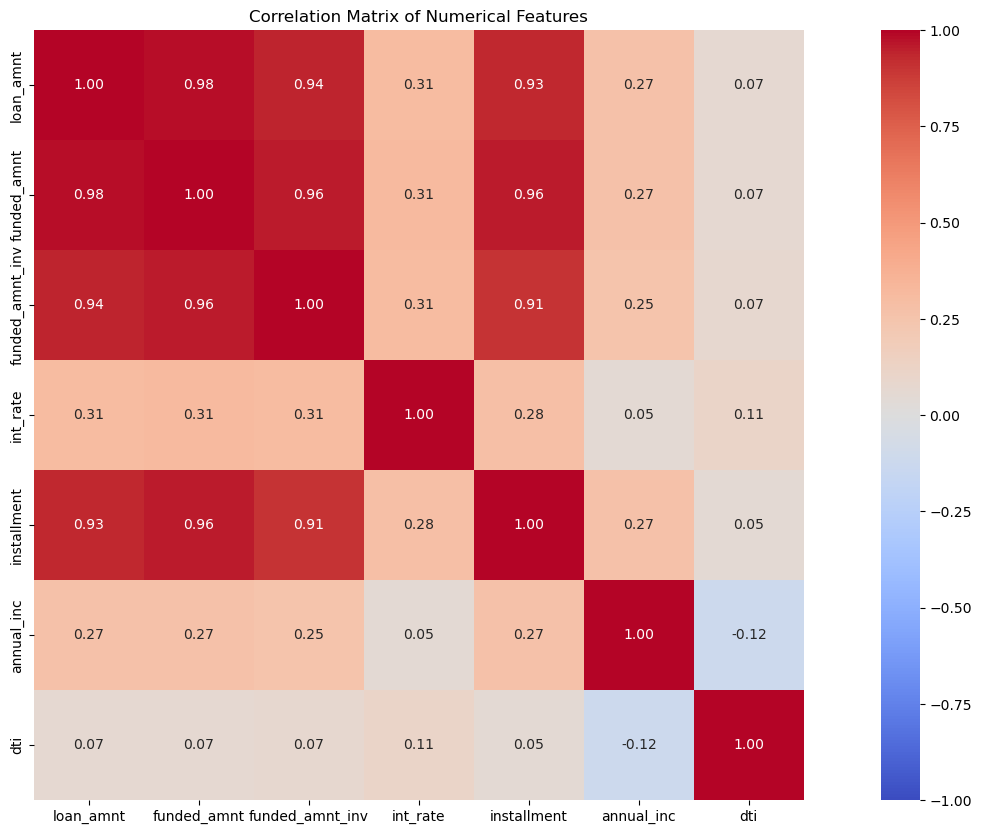

In [23]:
# List of numerical features
numerical_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']

# Compute the correlation matrix
corr_matrix = loan_data[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create a heatmap for the correlation matrix
sns.heatmap(
    corr_matrix, 
    annot=True,       # Annotate the heatmap with correlation values
    fmt=".2f",        # Format the numbers to two decimal places
    cmap="coolwarm",  # Use a diverging colormap
    vmin=-1, vmax=1,  # Correlation ranges from -1 to 1
    square=True       # Make the heatmap cells square
)

# Add a title
plt.title("Correlation Matrix of Numerical Features")

# Display the heatmap
plt.show()


- Loan Amount and Funded Amount (0.98): These two variables are almost perfectly correlated, since the funded amount is closely tied to the loan amount approved.
- Loan Amount and Installment (0.93): Larger loan amounts naturally result in higher installment payments.
- Funded Amount and Installment (0.96): Funded amounts also heavily influence installment size.
- Funded Amount and Funded Amount Inv (0.96): Funded amount and Funded amount by investors are also highly correlated and directly proportional to each other.

### Distribution of Term, Grades, Home Ownership, Purpose, Verification Status and Issue Year against the Loan Status

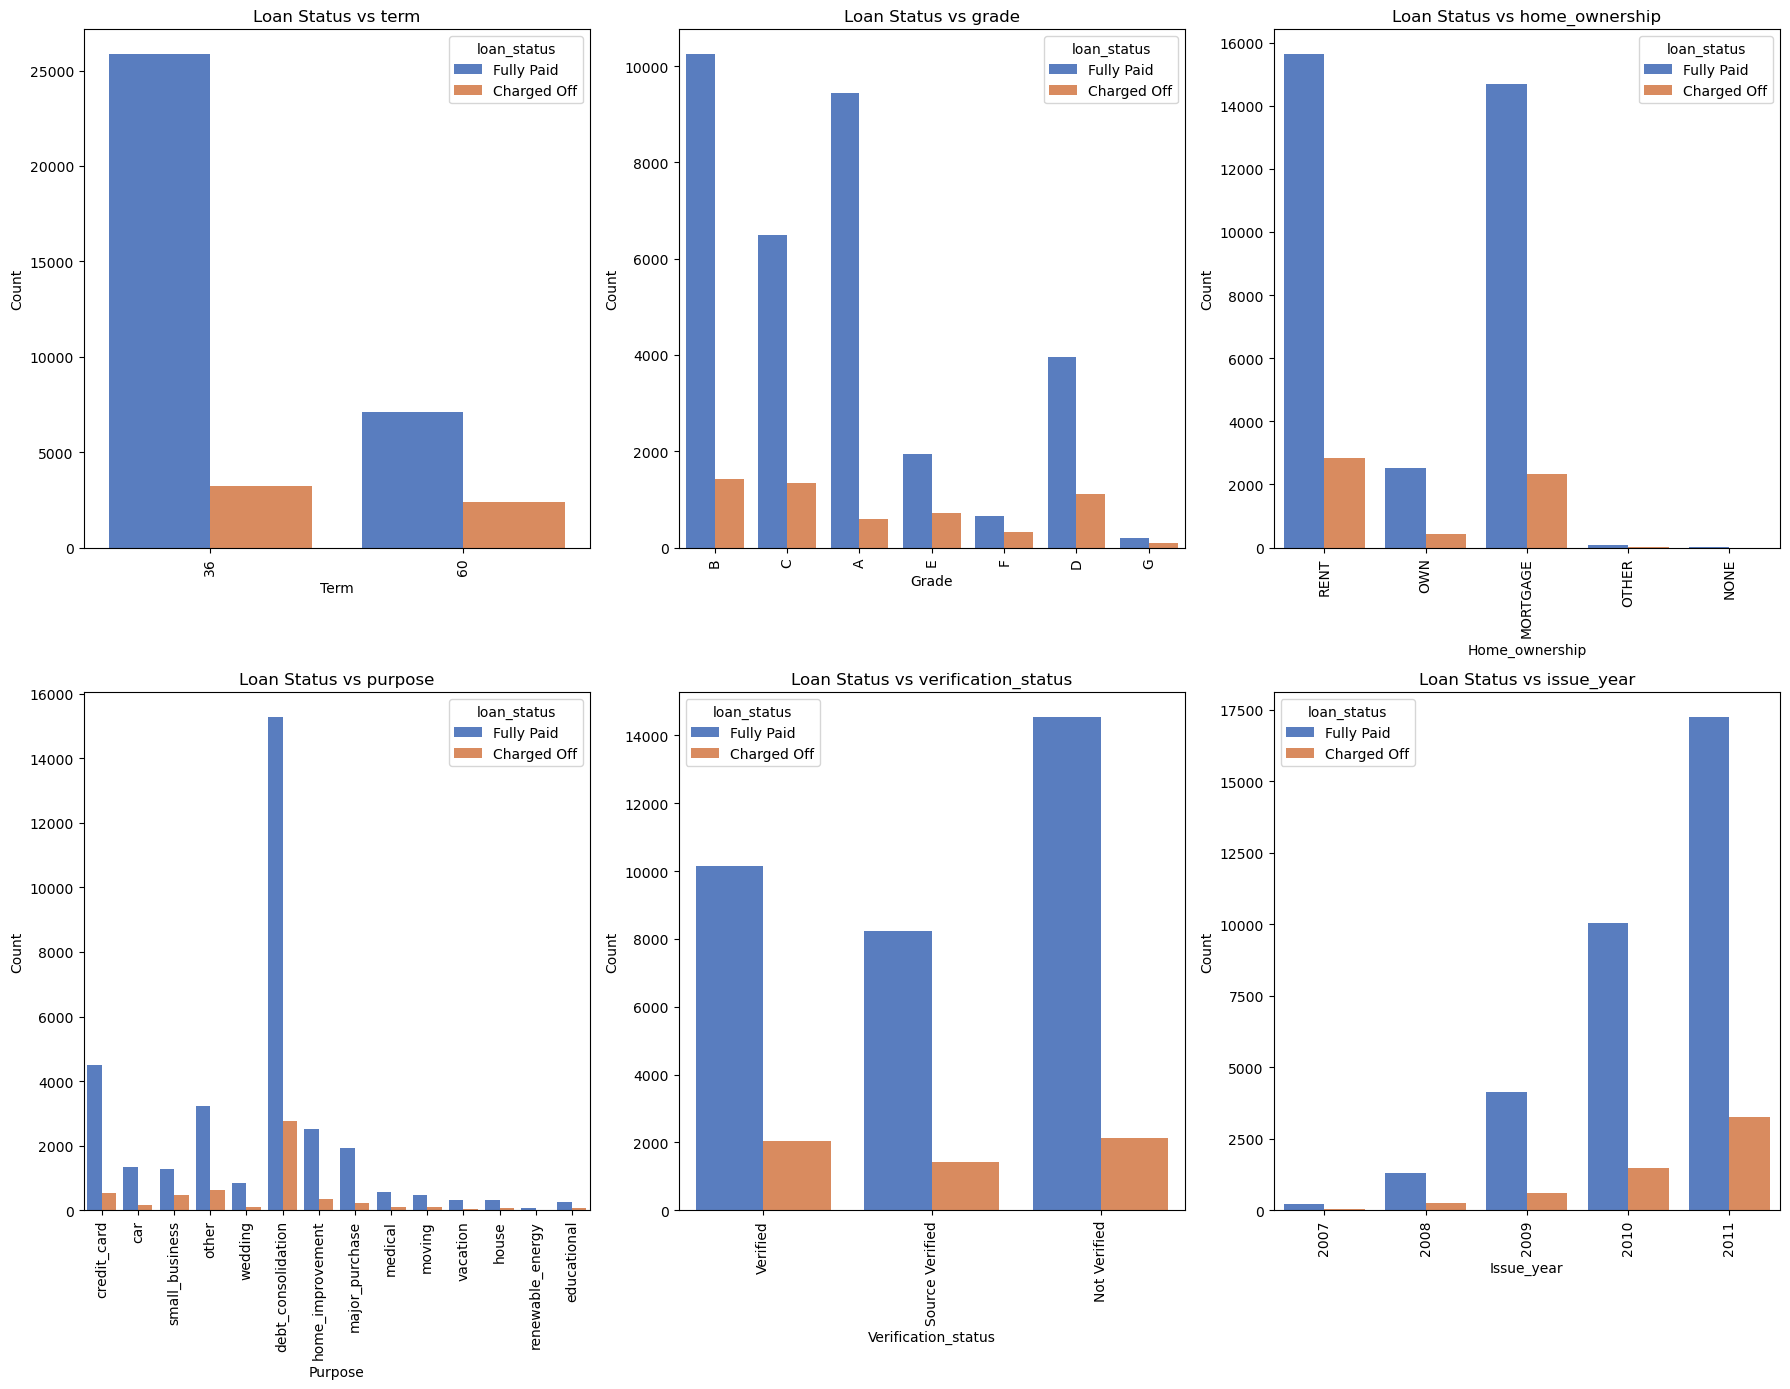

In [24]:
# List of categories you want to plot
categories = ['term', 'grade', 'home_ownership', 'purpose', 'verification_status', 'issue_year']

# Set up the matplotlib figure with 2 rows and 3 columns (2x3 grid)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 14))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each subplot and create a count plot
for i, col in enumerate(categories):
    sns.countplot(
        data=loan_data, 
        x=col, 
        hue='loan_status',  # Use loan_status as hue
        ax=axes[i], 
        palette='muted', 
        hue_order=['Fully Paid', 'Charged Off']
    )
    axes[i].set_title(f'Loan Status vs {col}')
    axes[i].set_xlabel(col.capitalize())  # Set x-axis label to category name
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

1. Term vs Loan Status: Loans with a 36-month term are less likely to default than 60-month term loans.
2. Grade vs Loan Status: A-grade loans have a very low risk compared to the other grades.
3. Home Ownership vs Loan Status: Homeowners are more likely to fully repay loans than renters or mortgagers.
4. Purpose vs Loan Status: Loans for debt consolidation are most commonly repaid, but most defaulters are seen in the same category as well.
5. Verification Status vs Loan Status: Surprisingly loans without verified income are less likely to default.
6. Issue Year vs Loan Status: Fully paid loans increased every year, but the defaulters increased as well.

Analysis:
Shorter terms, higher loan grades, home ownership, not verified income, and debt consolidation purpose loans are associated with a higher likelihood of being fully paid.